In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import graphviz


In [3]:
df=pd.read_csv(r"heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [16]:
print("First 5 rows:\n", df.head())
print("\nDataset Shape:", df.shape)
print("\nTarget value counts:\n", df['target'].value_counts())

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Shape: (1025, 14)

Target value counts:
 target
1    526
0    499
Name: count, dtype: int64


In [17]:
X = df.drop("target", axis=1)
y = df["target"]


In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
# 2. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



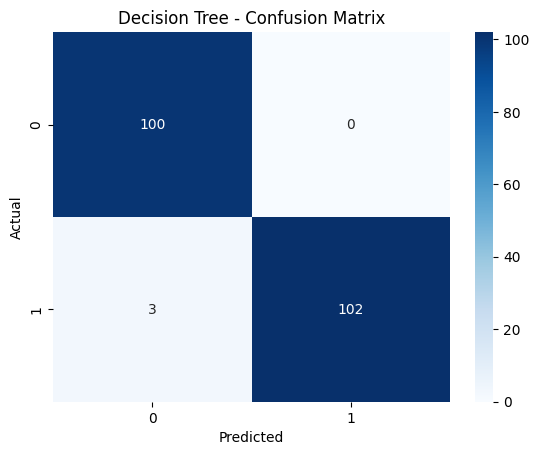

In [21]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


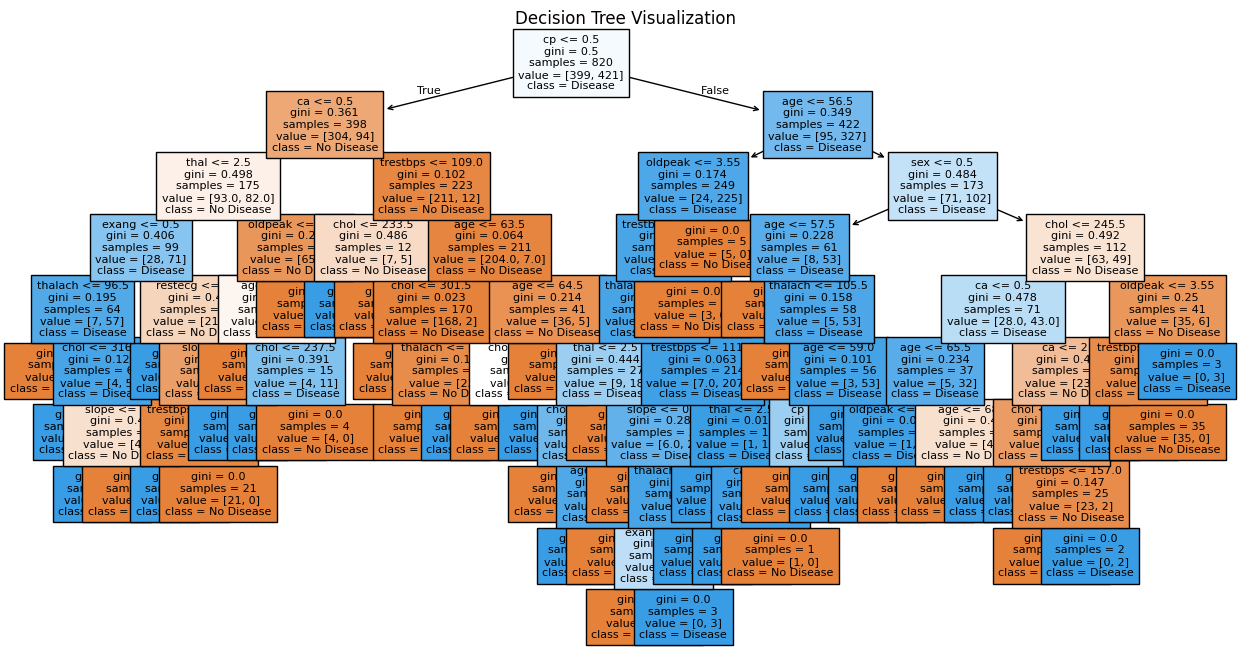

In [22]:
# Visualize tree with matplotlib
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()


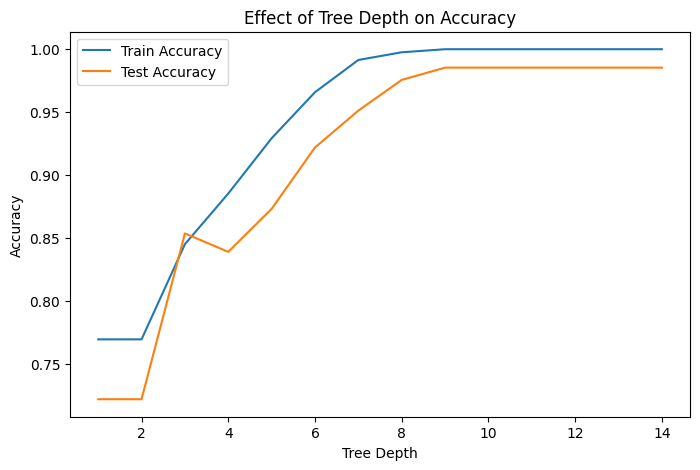

In [28]:
# 3. Overfitting Analysis (control depth)
depths = range(1, 15)
train_acc, test_acc = [], []

for d in depths:
    dt_temp = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_acc.append(dt_temp.score(X_train, y_train))
    test_acc.append(dt_temp.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Accuracy")
plt.legend()
plt.show()


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



C:\Users\naman\AppData\Local\Temp\ipykernel_18124\3042187431.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


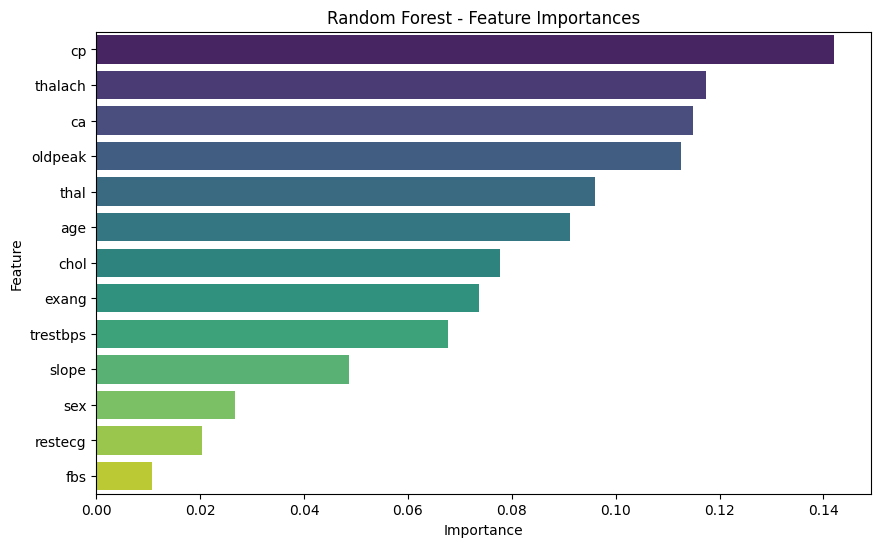

In [29]:
# 4. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Random Forest - Feature Importances")
plt.show()


In [30]:
# 5. Cross Validation
dt_cv_scores = cross_val_score(dt, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print("\nDecision Tree CV Accuracy:", dt_cv_scores.mean())
print("Random Forest CV Accuracy:", rf_cv_scores.mean())


Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073
